# Product Information

### Load Libraries, Load Data, Clean Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from adjustText import adjust_text


# Use a raw string to avoid escape sequence issues and specify encoding
df = pd.read_csv(r"c:/Users/rbrod/OneDrive/Documents/RB_Python_SuperStore_Project/Dataset/SuperstoreCSV.csv", encoding='ISO-8859-1')

# Convert the Order Date, and Ship Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d-%m-%Y')

# Format Customer Name to title case
df['Customer Name'] = df['Customer Name'].str.title()

## Which Sub-Categories contribute the highest revenue to overall sales? 

### Chart showing the Distribution of Sub-Category Sales (2014)

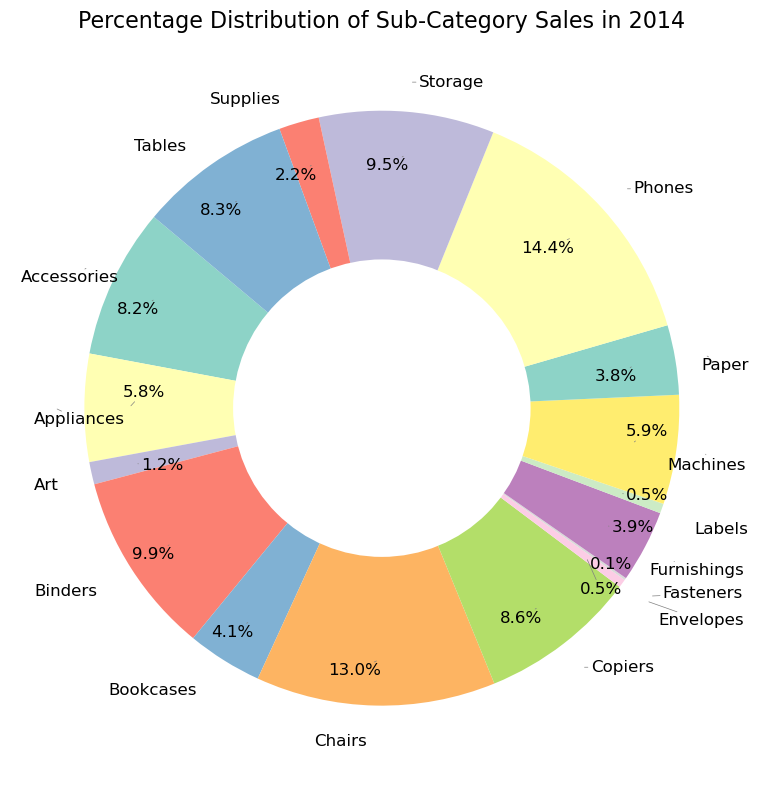

In [2]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014]

# Group by Sub-Category and sum the sales
sub_category_sales = df_2014.groupby('Sub-Category')['Sales'].sum().reset_index()

# Create a pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(
    sub_category_sales['Sales'], 
    labels=sub_category_sales['Sub-Category'], 
    autopct='%1.1f%%', 
    startangle=140, 
    pctdistance=0.85, 
    colors=plt.cm.Set3.colors
)

# Format text labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color('black')

# Adjust text positions to prevent overlap
adjust_text(texts + autotexts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Add a title
plt.title('Percentage Distribution of Sub-Category Sales in 2014', fontsize=16)

# Optional: Create a donut chart by adding a white circle at the center
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(centre_circle)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

## What are the Top 5 Selling Items in each of the Top 3 Sub-Categories?

### Chart showing Top 5 Selling Items in the Top 3 Sub-Categories

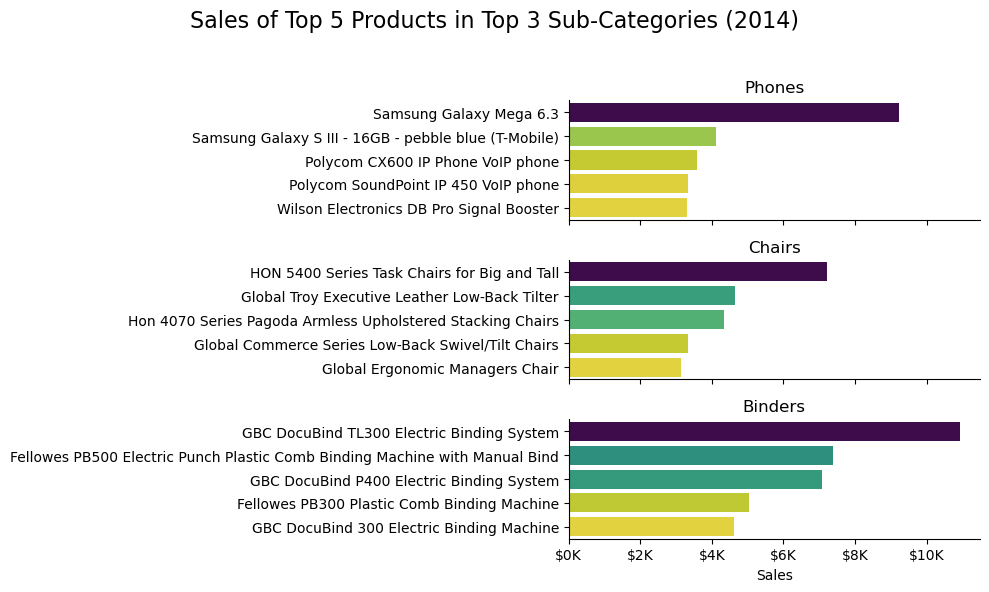

In [3]:
import matplotlib.ticker as mticker

# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[(df['Year'].isin([2014])) & (df['Sub-Category'].isin(['Phones', 'Chairs', 'Binders']))]

# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_filtered = df[(df['Year'] == 2014) & (df['Sub-Category'].isin(['Phones', 'Chairs', 'Binders']))]

# Get top 5 products in each specified subcategory
top_products = df_filtered.groupby(['Sub-Category', 'Product Name'])['Sales'].sum().reset_index()
top_products = (
    top_products
    .sort_values(by='Sales', ascending=False)
    .groupby('Sub-Category')
    .head(5)
    .reset_index(drop=True)
)

# Define the custom order for subcategories
subcategory_order = ['Phones', 'Chairs', 'Binders']

# Create a figure with subplots
fig, axes = plt.subplots(len(subcategory_order), 1, figsize=(10, 6), sharex=True)
fig.suptitle('Sales of Top 5 Products in Top 3 Sub-Categories (2014)', fontsize=16)

for ax, subcategory in zip(axes, subcategory_order):
    # Filter for the current subcategory
    subcategory_data = top_products[top_products['Sub-Category'] == subcategory]
    
    # Plot horizontal bar chart for the top products
    sns.barplot(x='Sales', y='Product Name', data=subcategory_data, ax=ax, hue='Sales', palette='viridis_r', legend=False)
    ax.set_title(subcategory)
    ax.set_ylabel('')
    ax.set_xlabel('Sales')  # X-axis label
    ax.tick_params(axis='y')  # Adjust y-axis ticks for better visibility

# Add a common x-label for the bottom subplot
axes[-1].set_xlabel('Sales')

# Format the Sales Labels
def currency_format(y, _):
    return f'${int(y // 1000)}K'
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for suptitle
plt.show()

## What are the top 10 most profitable products and the 10 least profitable products?

### Chart showing Top 10 Performing and Bottom 10 Performing Products for Profit

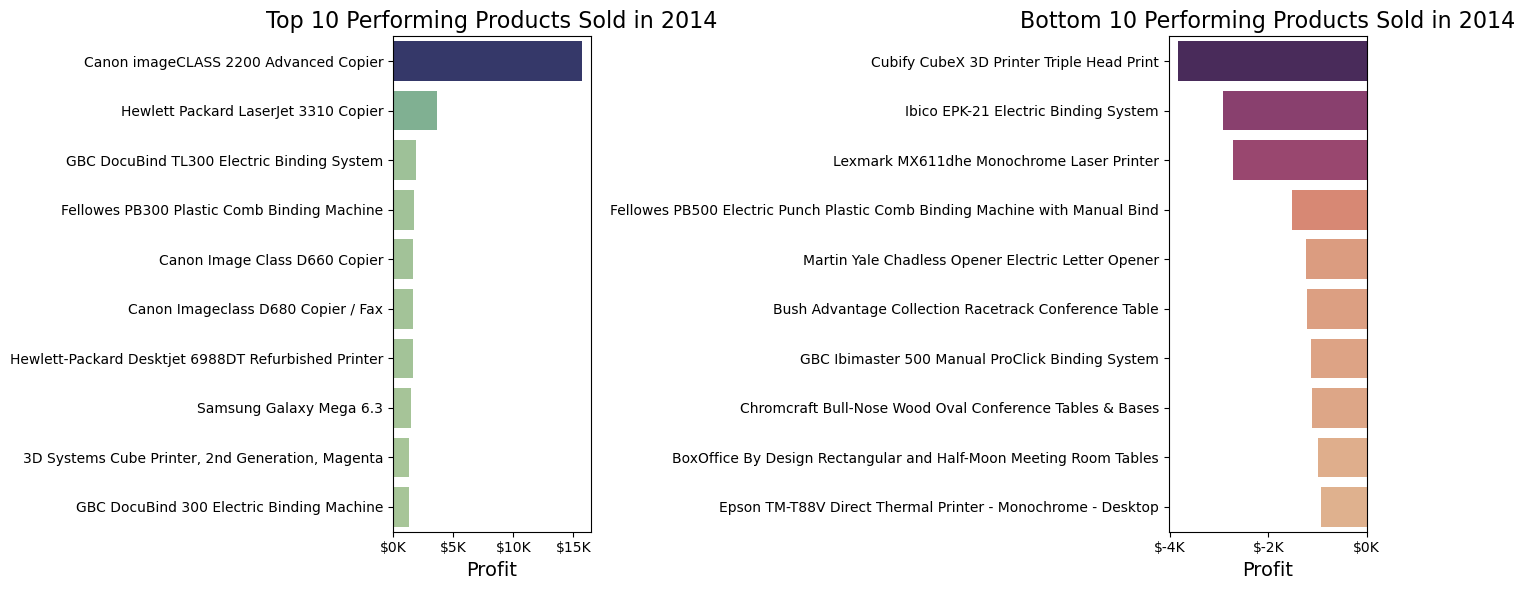

In [5]:
# Filter for the year 2014
df['Year'] = df['Order Date'].dt.year
df_2014 = df[df['Year'] == 2014].copy()

# Group by Product Name and sum the profits
product_sales_2014 = df_2014.groupby('Product Name')['Profit'].sum().reset_index()

# Get the 10 best performing products by profits
best_products = product_sales_2014.nlargest(10, 'Profit')

# Get the 10 worst performing products by profits
worst_products = product_sales_2014.nsmallest(10, 'Profit')

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the top 10 products
sns.barplot(x='Profit', y='Product Name', data=best_products, hue='Profit', palette='crest', ax=axes[0], orient='h')
axes[0].set_title('Top 10 Performing Products Sold in 2014', fontsize=16)
axes[0].set_xlabel('Profit', fontsize=14)
axes[0].set_ylabel('')
axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Plot for the bottom 10 products
sns.barplot(x='Profit', y='Product Name', data=worst_products, hue='Profit', palette='flare_r', ax=axes[1], orient='h')
axes[1].set_title('Bottom 10 Performing Products Sold in 2014', fontsize=16)
axes[1].set_xlabel('Profit', fontsize=14)
axes[1].set_ylabel('')
axes[1].xaxis.set_major_formatter(mticker.FuncFormatter(currency_format))

# Remove legends from both plots
axes[0].legend_.remove()
axes[1].legend_.remove()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()